In [28]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [29]:
data = pd.read_csv("D:\FreeLance work\dataset_1.csv")

In [30]:
threshold = 0.2
missing_percentage = data.isnull().sum() / len(data)
filtered_data = data.loc[:, missing_percentage <= threshold]

In [31]:
# Separate categorical and numerical data
categorical_cols = filtered_data.select_dtypes(include=['object']).columns
numerical_cols = filtered_data.select_dtypes(exclude=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    filtered_data[col] = le.fit_transform(filtered_data[col].astype(str))
    label_encoders[col] = le

imputer = IterativeImputer(max_iter=10, random_state=42)
imputed_data_numerical = pd.DataFrame(imputer.fit_transform(filtered_data[numerical_cols]), columns=numerical_cols)

imputed_data = pd.concat([imputed_data_numerical, filtered_data[categorical_cols]], axis=1)
print(imputed_data.head())

   subject_id  los_hospital   age  glucose_mean  heart_rate_mean    sbp_mean  \
0  19912620.0          19.0  73.0    140.857143       100.291667  137.368421   
1  16632367.0          13.0  61.0    120.000000        90.851852  108.478261   
2  17812252.0           2.0  82.0    211.285714        82.173913  107.208333   
3  16958639.0           8.0  70.0    135.800000        77.592593  100.481482   
4  15275707.0          10.0  47.0    210.000000       123.375000  124.000000   

    dbp_mean   mbp_mean  resp_rate_mean  temperature_mean  ...  \
0  54.736842  71.631579       24.500000         37.652857  ...   
1  65.347826  75.772727       26.407407         36.048750  ...   
2  42.145833  59.979167       29.395833         34.601667  ...   
3  43.703704  57.111111       14.964286         36.901667  ...   
4  72.708333  84.291667       22.375000         38.470000  ...   

   malignant_cancer  severe_liver_disease  metastatic_solid_tumor  aids  \
0               0.0                   0.0      

In [ ]:
X = imputed_data.drop('AKI', axis=1)
y = imputed_data['AKI']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

C:\Users\shahe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred = logistic_model.predict(X_test)
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC Score: {auc}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8669724770642202
AUC Score: 0.8820638820638821
Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.24      0.36        33
         1.0       0.88      0.98      0.93       185

    accuracy                           0.87       218
   macro avg       0.77      0.61      0.64       218
weighted avg       0.85      0.87      0.84       218

Confusion Matrix:
[[  8  25]
 [  4 181]]


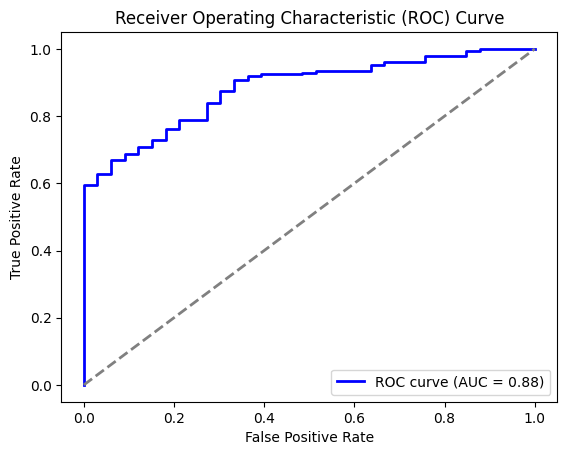

: 

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()